In [1]:
# %pip install pandas networkx scipy loguru sklearn autograd openpyxl

In [2]:
import os 
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from copy import deepcopy
from scipy.spatial.distance import pdist
import itertools as it 
os.chdir('..')
from src.data_cleaning import *
from src.autograd_mds import *
from autograd import grad, elementwise_grad 
from loguru import logger
import sys

from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA
from sklearn.utils import check_random_state
from sklearn.manifold import MDS
# Unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import warnings


In [3]:


EPSILON = np.finfo(np.float32).eps
n_samples = 33
seed = np.random.RandomState(seed=3)
X_true = seed.randint(0, 20, 2 * n_samples).astype(float)
X_true = X_true.reshape((n_samples, 2))
# Center the data
X_true -= X_true.mean()

similarities = euclidean_distances(X_true)

# Add noise to the similarities
noise = np.random.exponential(0.95, size=(n_samples, n_samples))
noise = noise + noise.T
noise[np.arange(noise.shape[0]), np.arange(noise.shape[0])] = 0
similarities += noise
nmds = manifold.MDS(
    n_components=2,
    metric=False,
    max_iter=3000,
    eps=1e-12,
    dissimilarity="precomputed",
    random_state=seed,
    n_jobs=1,
    n_init=100,
)
npos = nmds.fit_transform(similarities)


In [4]:
X_true

array([[ 0.96969697, -6.03030303],
       [-1.03030303, -9.03030303],
       [ 9.96969697,  0.96969697],
       [ 1.96969697, -0.03030303],
       [ 0.96969697, -3.03030303],
       [-9.03030303,  2.96969697],
       [-2.03030303,  4.96969697],
       [ 7.96969697, -7.03030303],
       [-7.03030303, -8.03030303],
       [ 9.96969697, -4.03030303],
       [-1.03030303,  4.96969697],
       [-8.03030303,  0.96969697],
       [-2.03030303,  1.96969697],
       [-8.03030303,  5.96969697],
       [ 6.96969697, -4.03030303],
       [ 7.96969697,  4.96969697],
       [-9.03030303, -9.03030303],
       [-0.03030303,  8.96969697],
       [-4.03030303, -2.03030303],
       [-4.03030303,  4.96969697],
       [-8.03030303,  7.96969697],
       [-8.03030303,  0.96969697],
       [ 1.96969697, -5.03030303],
       [-6.03030303,  6.96969697],
       [ 6.96969697, -9.03030303],
       [ 6.96969697,  8.96969697],
       [ 8.96969697,  1.96969697],
       [-9.03030303,  3.96969697],
       [-4.03030303,

In [5]:
similarity_vec = np.tril(similarities, -1)
similarity_vec = similarity_vec[np.nonzero(similarity_vec)]
dissimilarities = max(similarity_vec) - similarity_vec + 0.05
# dissimilarities/= np.linalg.norm(dissimilarities)

2022-08-31 04:57:48.561 | INFO     | src.autograd_mds:stress:53 - Sstar: 0.5896992097948716
2022-08-31 04:57:48.565 | INFO     | src.autograd_mds:stress:55 - Tstar: 1.0000000000000002
2022-08-31 04:57:48.567 | INFO     | src.autograd_mds:my_mds_training_loop:215 - Starting Stress: 0.7679187520791971
2022-08-31 04:57:48.704 | INFO     | src.autograd_mds:stress:53 - Sstar: Autograd ArrayBox with value 0.5896992097948716
2022-08-31 04:57:48.706 | INFO     | src.autograd_mds:stress:55 - Tstar: 1.0000000000000002
2022-08-31 04:57:48.826 | INFO     | src.autograd_mds:my_mds_training_loop:218 - Starting Gradient magnitude: 0.765550888722332


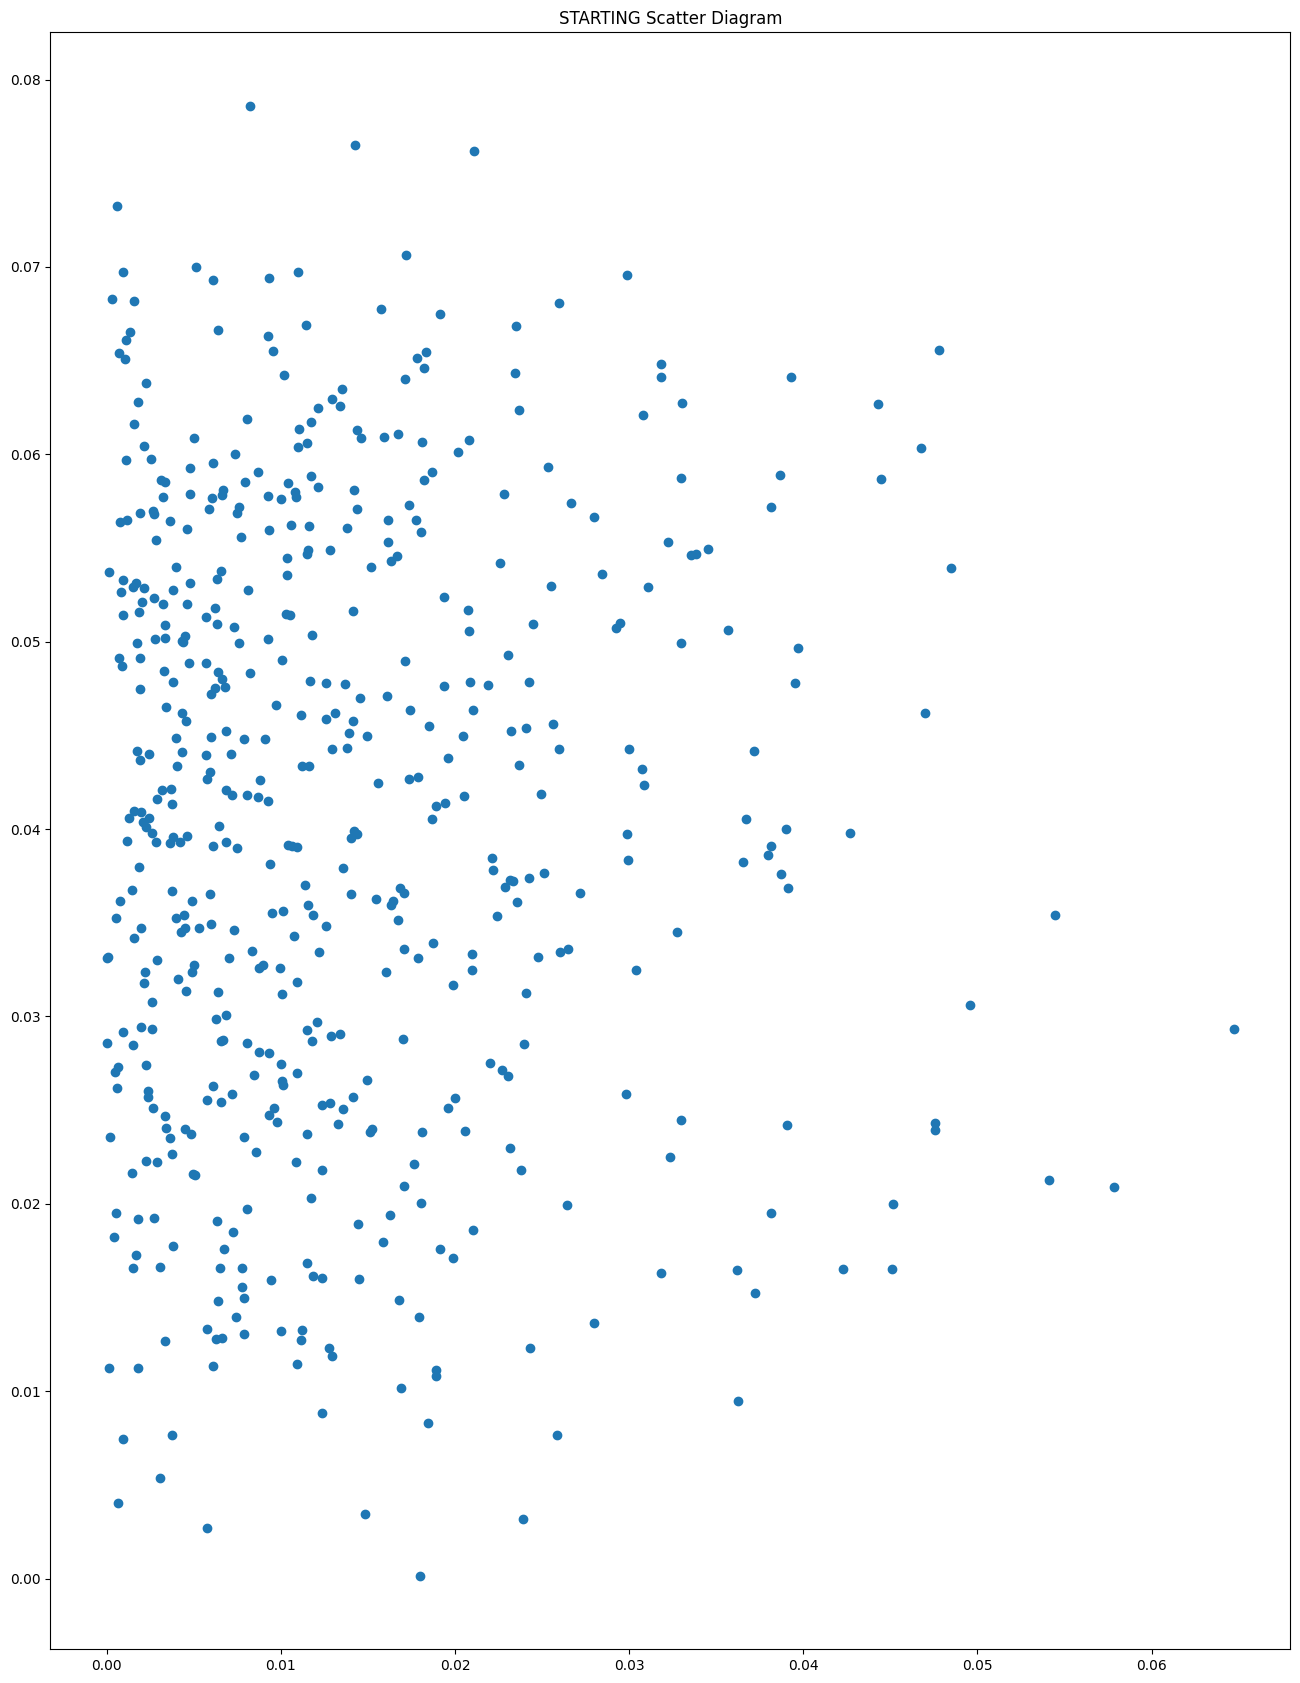

/usr/local/lib/python3.8/dist-packages/numpy/core/numeric.py:2457: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a1, a2 = asarray(a1), asarray(a2)
2022-08-31 04:57:53.031 | INFO     | src.autograd_mds:stress:53 - Sstar: 0.14339788175155155
2022-08-31 04:57:53.032 | INFO     | src.autograd_mds:stress:55 - Tstar: 1.0000000000000002
2022-08-31 04:57:53.034 | INFO     | src.autograd_mds:my_mds_training_loop:235 - stress: 0.37867912769461104
2022-08-31 04:57:53.178 | INFO     | src.autograd_mds:stress:53 - Sstar: Autograd ArrayBox with value 0.5896992097948716
2022-08-31 04:57:53.181 | INFO     | src.autograd_mds:stress:55 - Tstar: 1.0000000000000002
2022-08-31 04:57:53.292 | INFO     | src.autograd_mds:my_mds_training_loop:241 - Gradient magnitude: 0.765550888722332


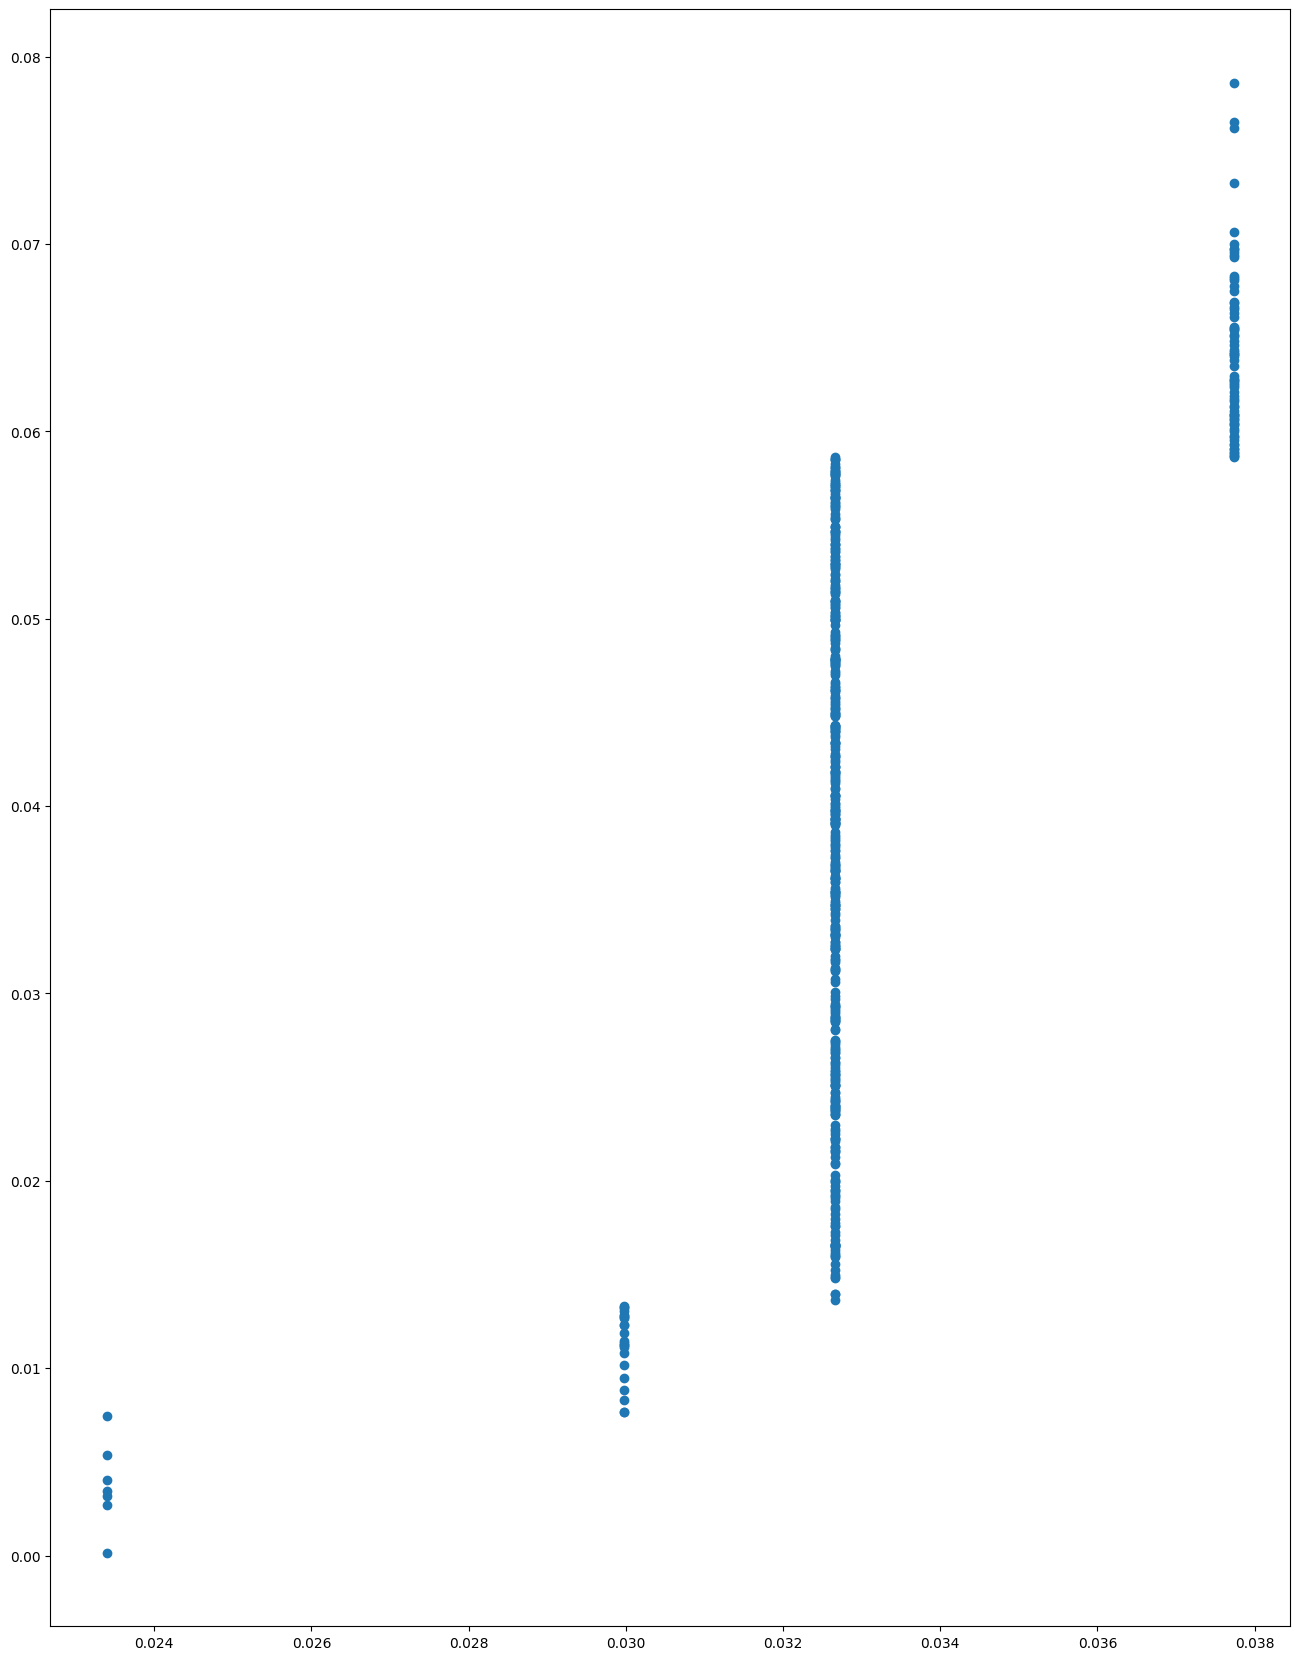

2022-08-31 04:57:56.552 | INFO     | src.autograd_mds:stress:53 - Sstar: 0.061870869300735876
2022-08-31 04:57:56.555 | INFO     | src.autograd_mds:stress:55 - Tstar: 1.0000000000000002
2022-08-31 04:57:56.556 | INFO     | src.autograd_mds:my_mds_training_loop:235 - stress: 0.2487385561201477
2022-08-31 04:57:56.814 | INFO     | src.autograd_mds:stress:53 - Sstar: Autograd ArrayBox with value 399259.0486381942
2022-08-31 04:57:56.817 | INFO     | src.autograd_mds:stress:55 - Tstar: 1.0000000000000002
2022-08-31 04:57:56.939 | INFO     | src.autograd_mds:my_mds_training_loop:241 - Gradient magnitude: 70.05562653515524


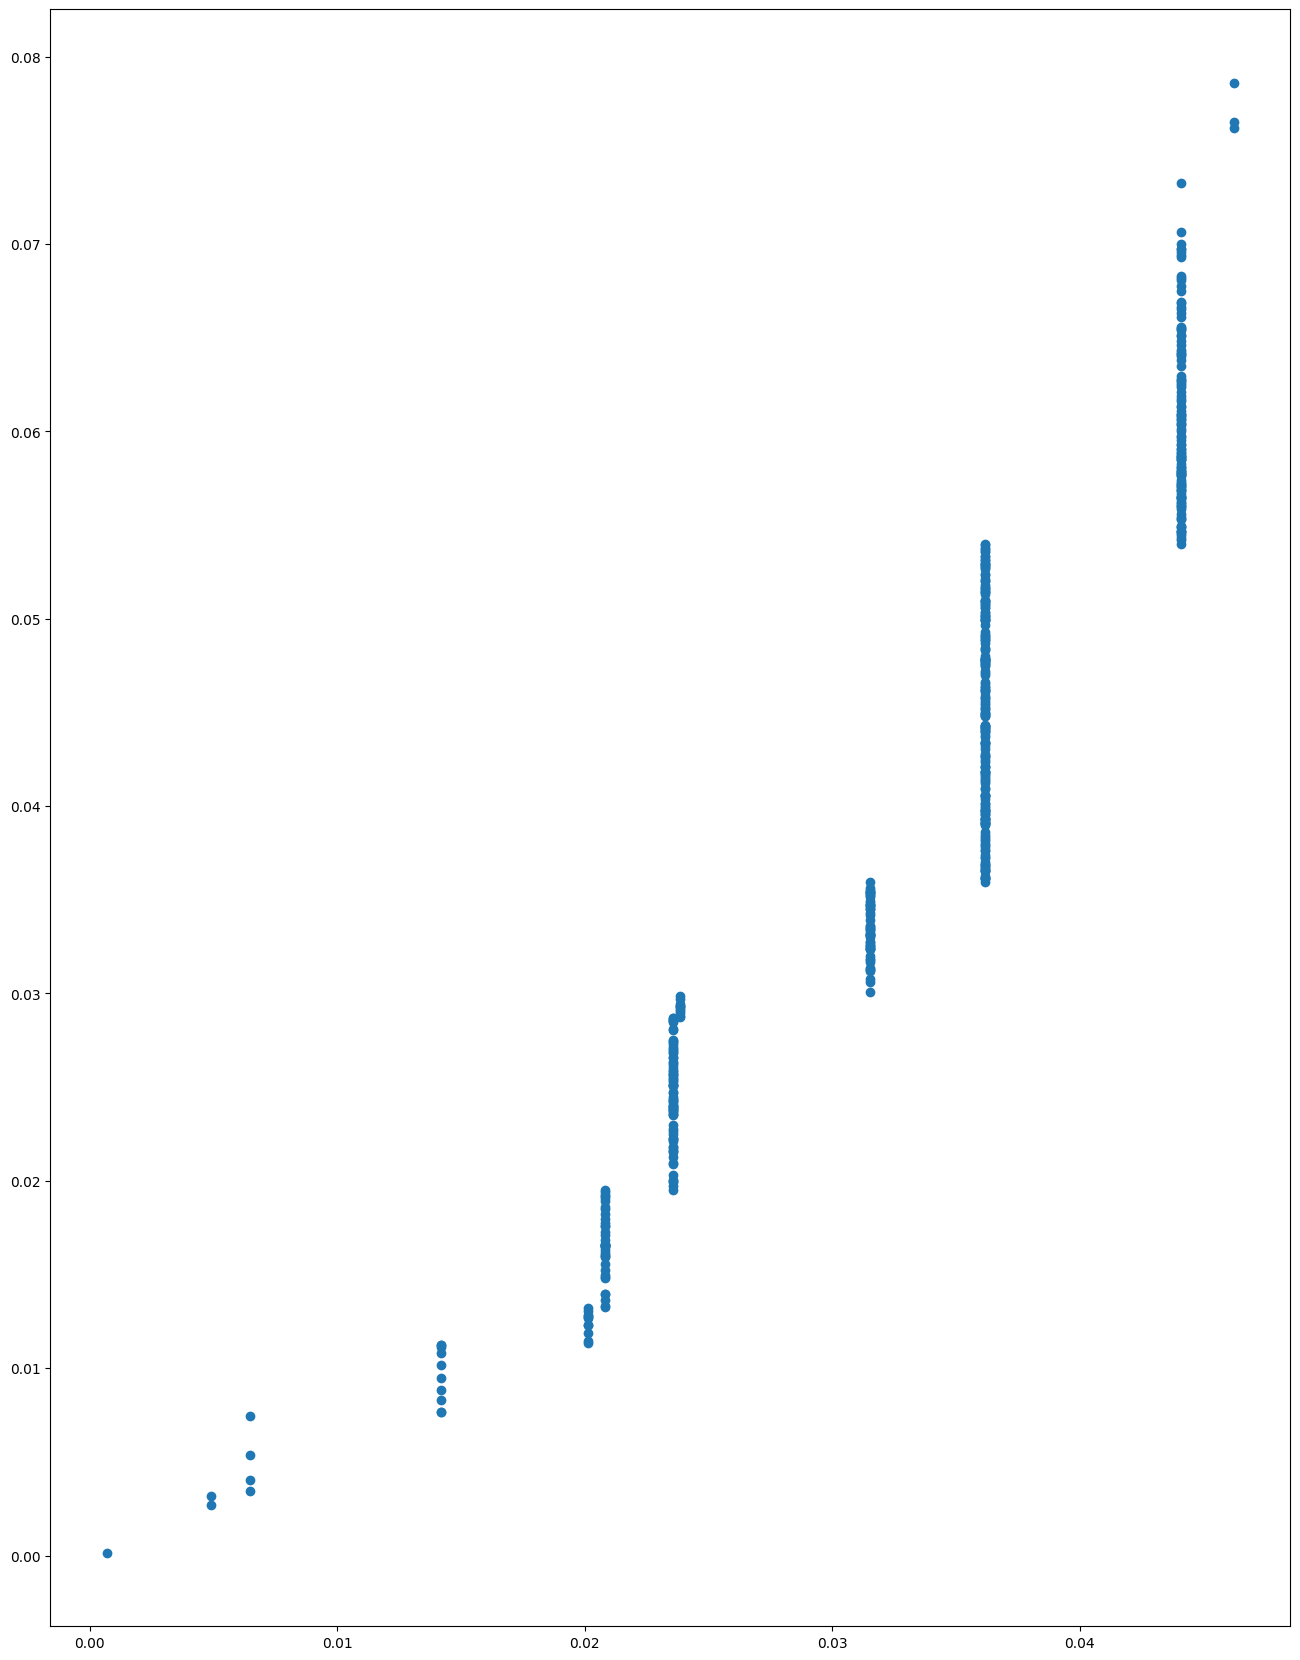

2022-08-31 04:58:00.468 | INFO     | src.autograd_mds:stress:53 - Sstar: 0.07831743261498962
2022-08-31 04:58:00.470 | INFO     | src.autograd_mds:stress:55 - Tstar: 1.0000000000000002
2022-08-31 04:58:00.473 | INFO     | src.autograd_mds:my_mds_training_loop:235 - stress: 0.27985251940082584
2022-08-31 04:58:00.558 | INFO     | src.autograd_mds:stress:53 - Sstar: Autograd ArrayBox with value 8.557237618355387e+51
2022-08-31 04:58:00.560 | INFO     | src.autograd_mds:stress:55 - Tstar: 1.0000000000000002


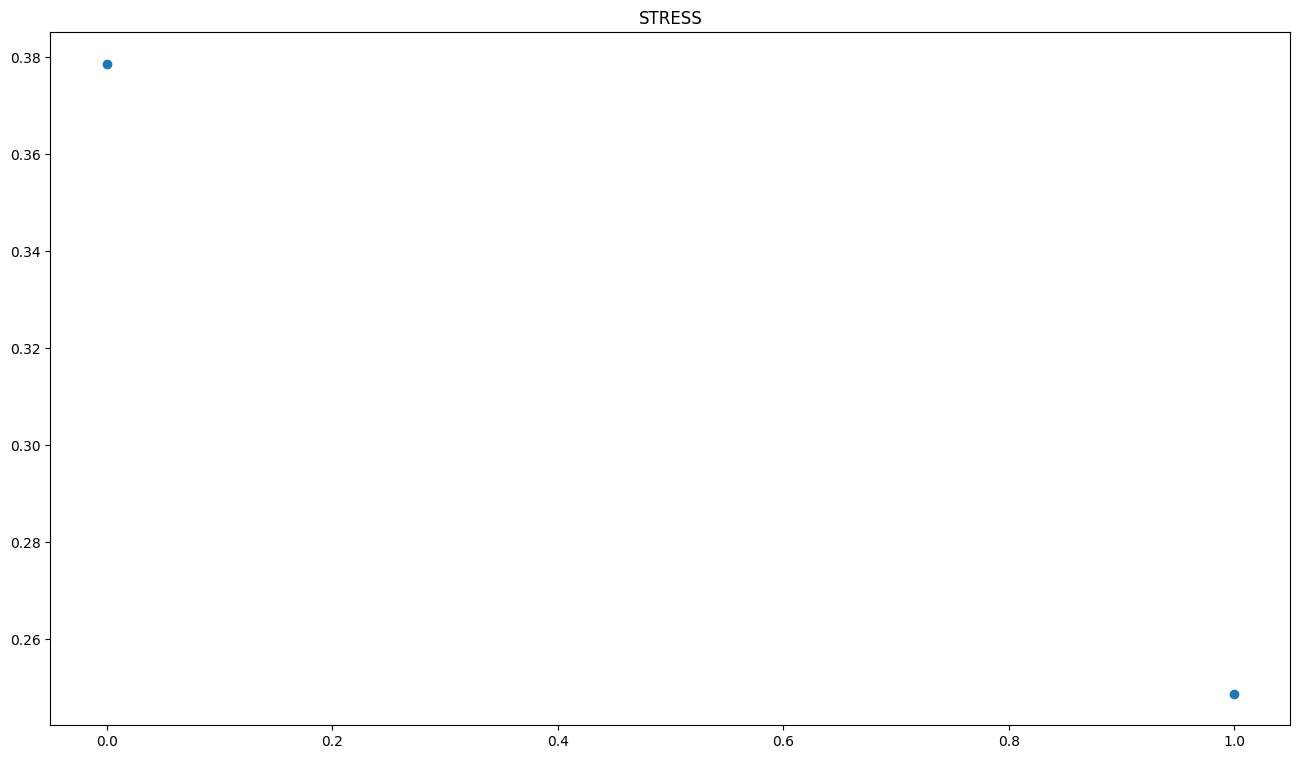

2022-08-31 04:58:00.912 | INFO     | src.autograd_mds:stress:53 - Sstar: 0.5495851694887716
2022-08-31 04:58:00.914 | INFO     | src.autograd_mds:stress:55 - Tstar: 1.0000000000000002
2022-08-31 04:58:00.916 | INFO     | src.autograd_mds:my_mds_training_loop:215 - Starting Stress: 0.7413401172800319
2022-08-31 04:58:01.152 | INFO     | src.autograd_mds:stress:53 - Sstar: Autograd ArrayBox with value 0.5495851694887716
2022-08-31 04:58:01.154 | INFO     | src.autograd_mds:stress:55 - Tstar: 1.0000000000000002
2022-08-31 04:58:01.273 | INFO     | src.autograd_mds:my_mds_training_loop:218 - Starting Gradient magnitude: 0.725780816931698


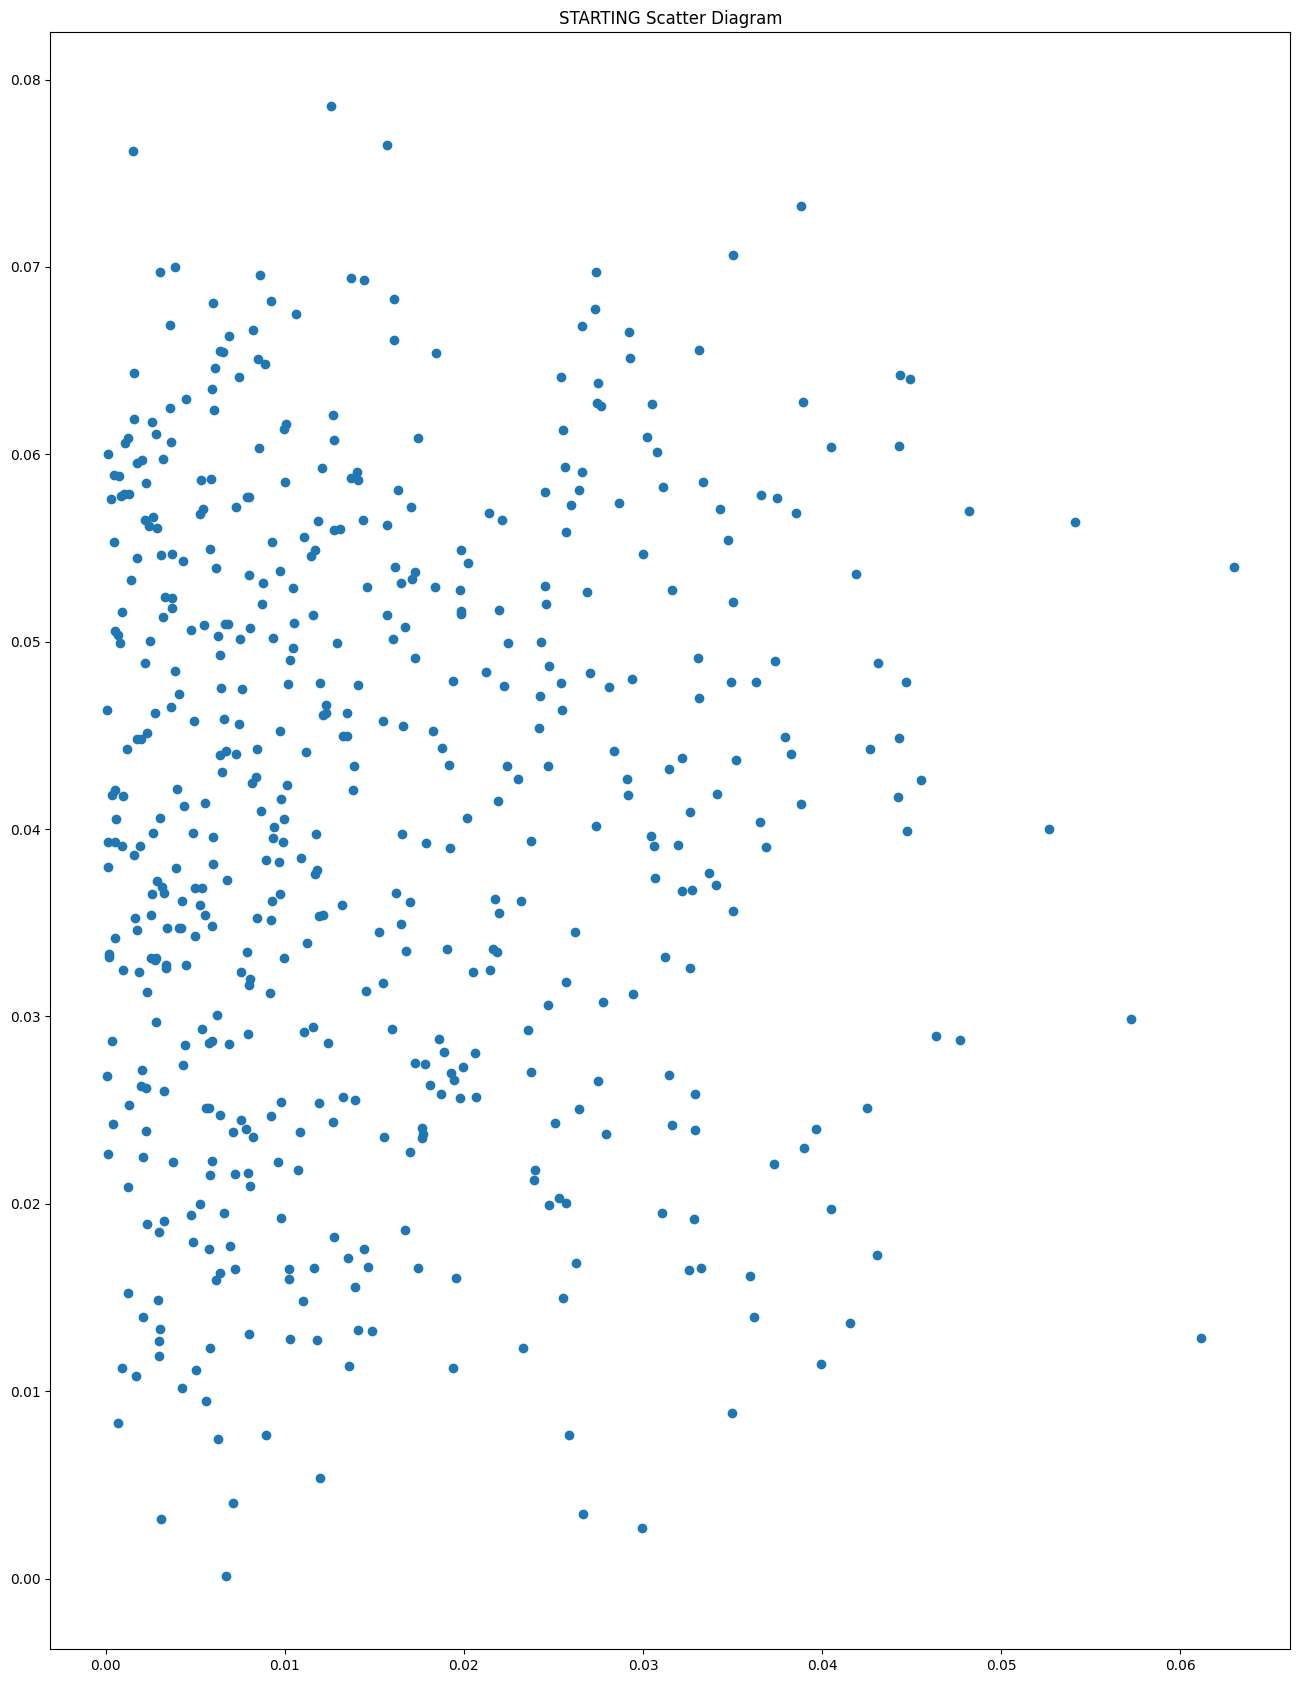

2022-08-31 04:58:05.807 | INFO     | src.autograd_mds:stress:53 - Sstar: 0.12665875961282227
2022-08-31 04:58:05.809 | INFO     | src.autograd_mds:stress:55 - Tstar: 1.0000000000000002
2022-08-31 04:58:05.810 | INFO     | src.autograd_mds:my_mds_training_loop:235 - stress: 0.35589149977601636
2022-08-31 04:58:05.927 | INFO     | src.autograd_mds:stress:53 - Sstar: Autograd ArrayBox with value 0.5495851694887716
2022-08-31 04:58:05.929 | INFO     | src.autograd_mds:stress:55 - Tstar: 1.0000000000000002
2022-08-31 04:58:06.033 | INFO     | src.autograd_mds:my_mds_training_loop:241 - Gradient magnitude: 0.725780816931698


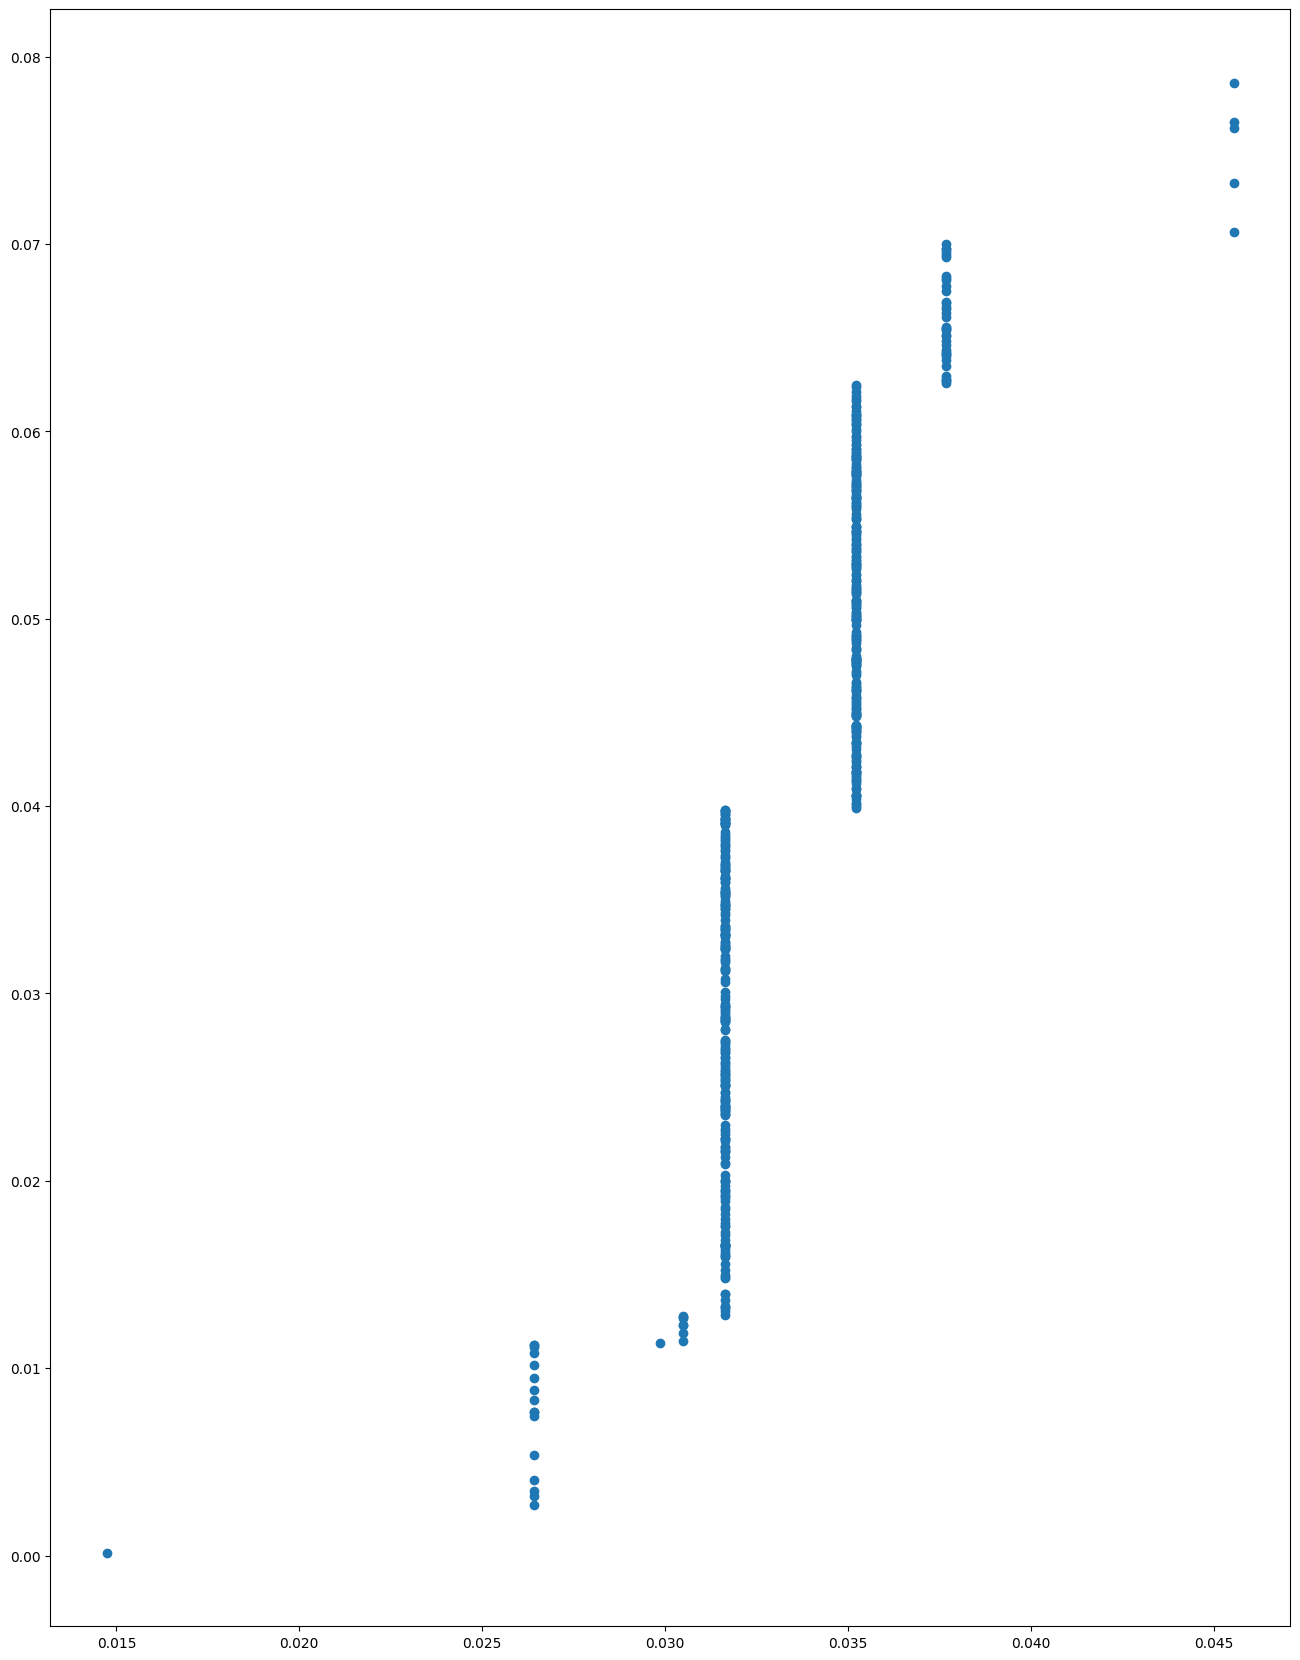

2022-08-31 04:58:09.822 | INFO     | src.autograd_mds:stress:53 - Sstar: 0.06754495685238454
2022-08-31 04:58:09.824 | INFO     | src.autograd_mds:stress:55 - Tstar: 1.0000000000000002
2022-08-31 04:58:09.825 | INFO     | src.autograd_mds:my_mds_training_loop:235 - stress: 0.25989412623679
2022-08-31 04:58:09.943 | INFO     | src.autograd_mds:stress:53 - Sstar: Autograd ArrayBox with value 241156.50817517992
2022-08-31 04:58:09.947 | INFO     | src.autograd_mds:stress:55 - Tstar: 1.0000000000000002
2022-08-31 04:58:10.063 | INFO     | src.autograd_mds:my_mds_training_loop:241 - Gradient magnitude: 62.20991058441849


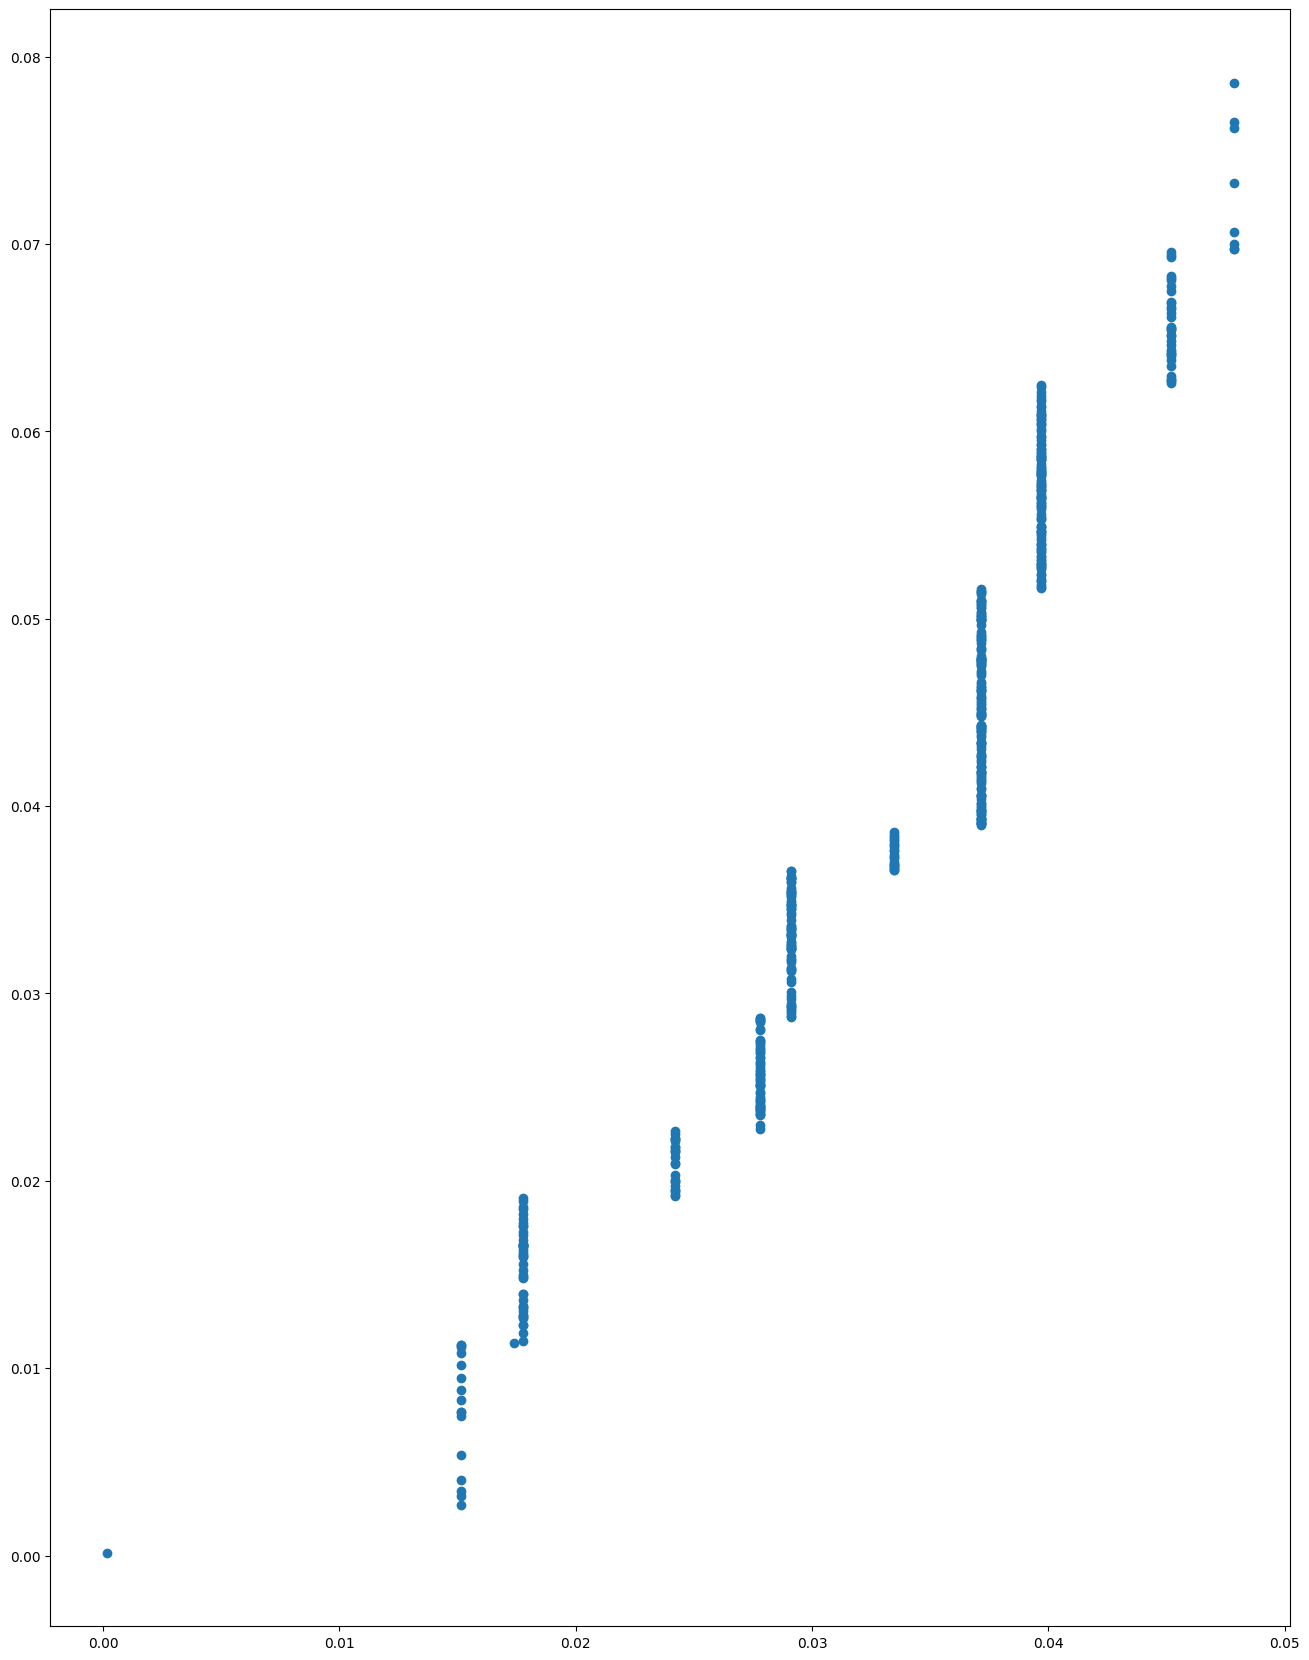

2022-08-31 04:58:13.493 | INFO     | src.autograd_mds:stress:53 - Sstar: 0.08774144695188517
2022-08-31 04:58:13.495 | INFO     | src.autograd_mds:stress:55 - Tstar: 1.0000000000000002
2022-08-31 04:58:13.496 | INFO     | src.autograd_mds:my_mds_training_loop:235 - stress: 0.29621182783927646
2022-08-31 04:58:13.754 | INFO     | src.autograd_mds:stress:53 - Sstar: Autograd ArrayBox with value 3.818289036094793e+47
2022-08-31 04:58:13.755 | INFO     | src.autograd_mds:stress:55 - Tstar: 1.0000000000000002


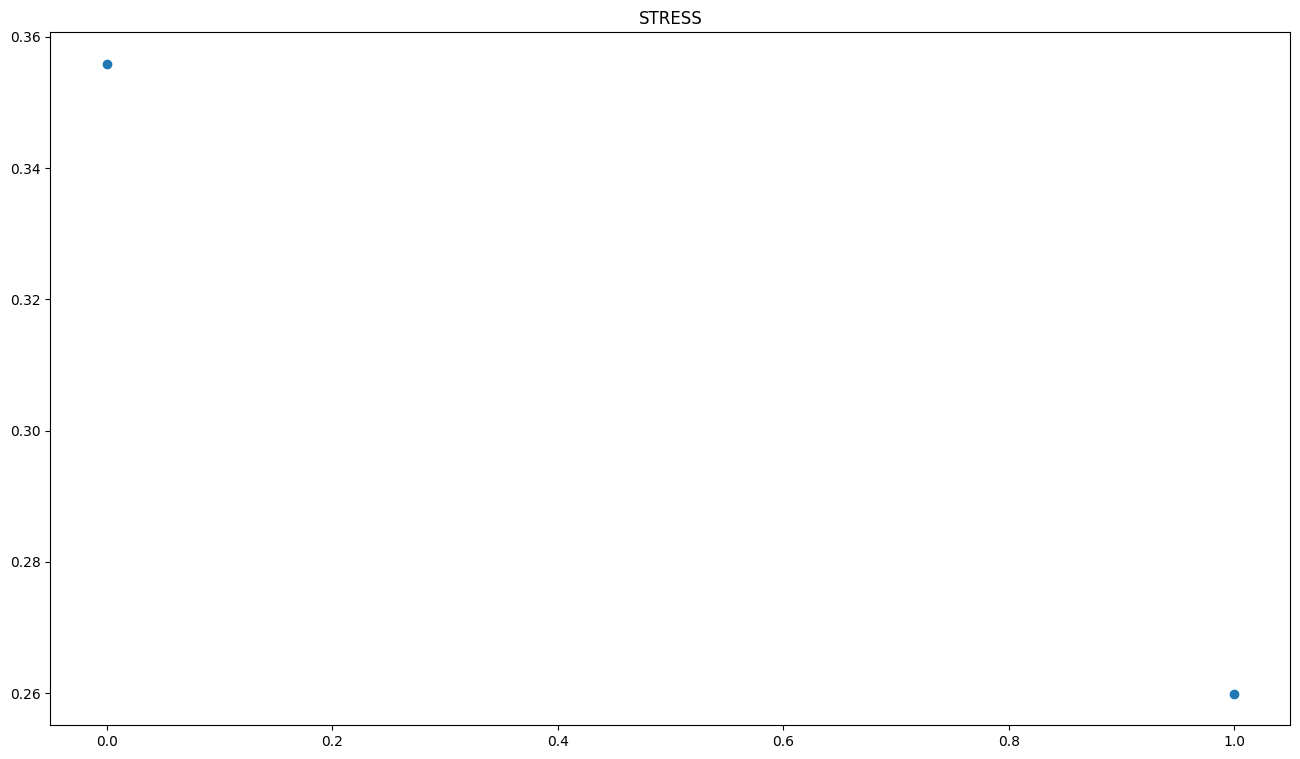

2022-08-31 04:58:14.095 | INFO     | src.autograd_mds:stress:53 - Sstar: 0.5375157887864888
2022-08-31 04:58:14.097 | INFO     | src.autograd_mds:stress:55 - Tstar: 1.0000000000000002
2022-08-31 04:58:14.098 | INFO     | src.autograd_mds:my_mds_training_loop:215 - Starting Stress: 0.7331546827146974
2022-08-31 04:58:14.213 | INFO     | src.autograd_mds:stress:53 - Sstar: Autograd ArrayBox with value 0.5375157887864888
2022-08-31 04:58:14.215 | INFO     | src.autograd_mds:stress:55 - Tstar: 1.0000000000000002
2022-08-31 04:58:14.337 | INFO     | src.autograd_mds:my_mds_training_loop:218 - Starting Gradient magnitude: 0.5824783120143128


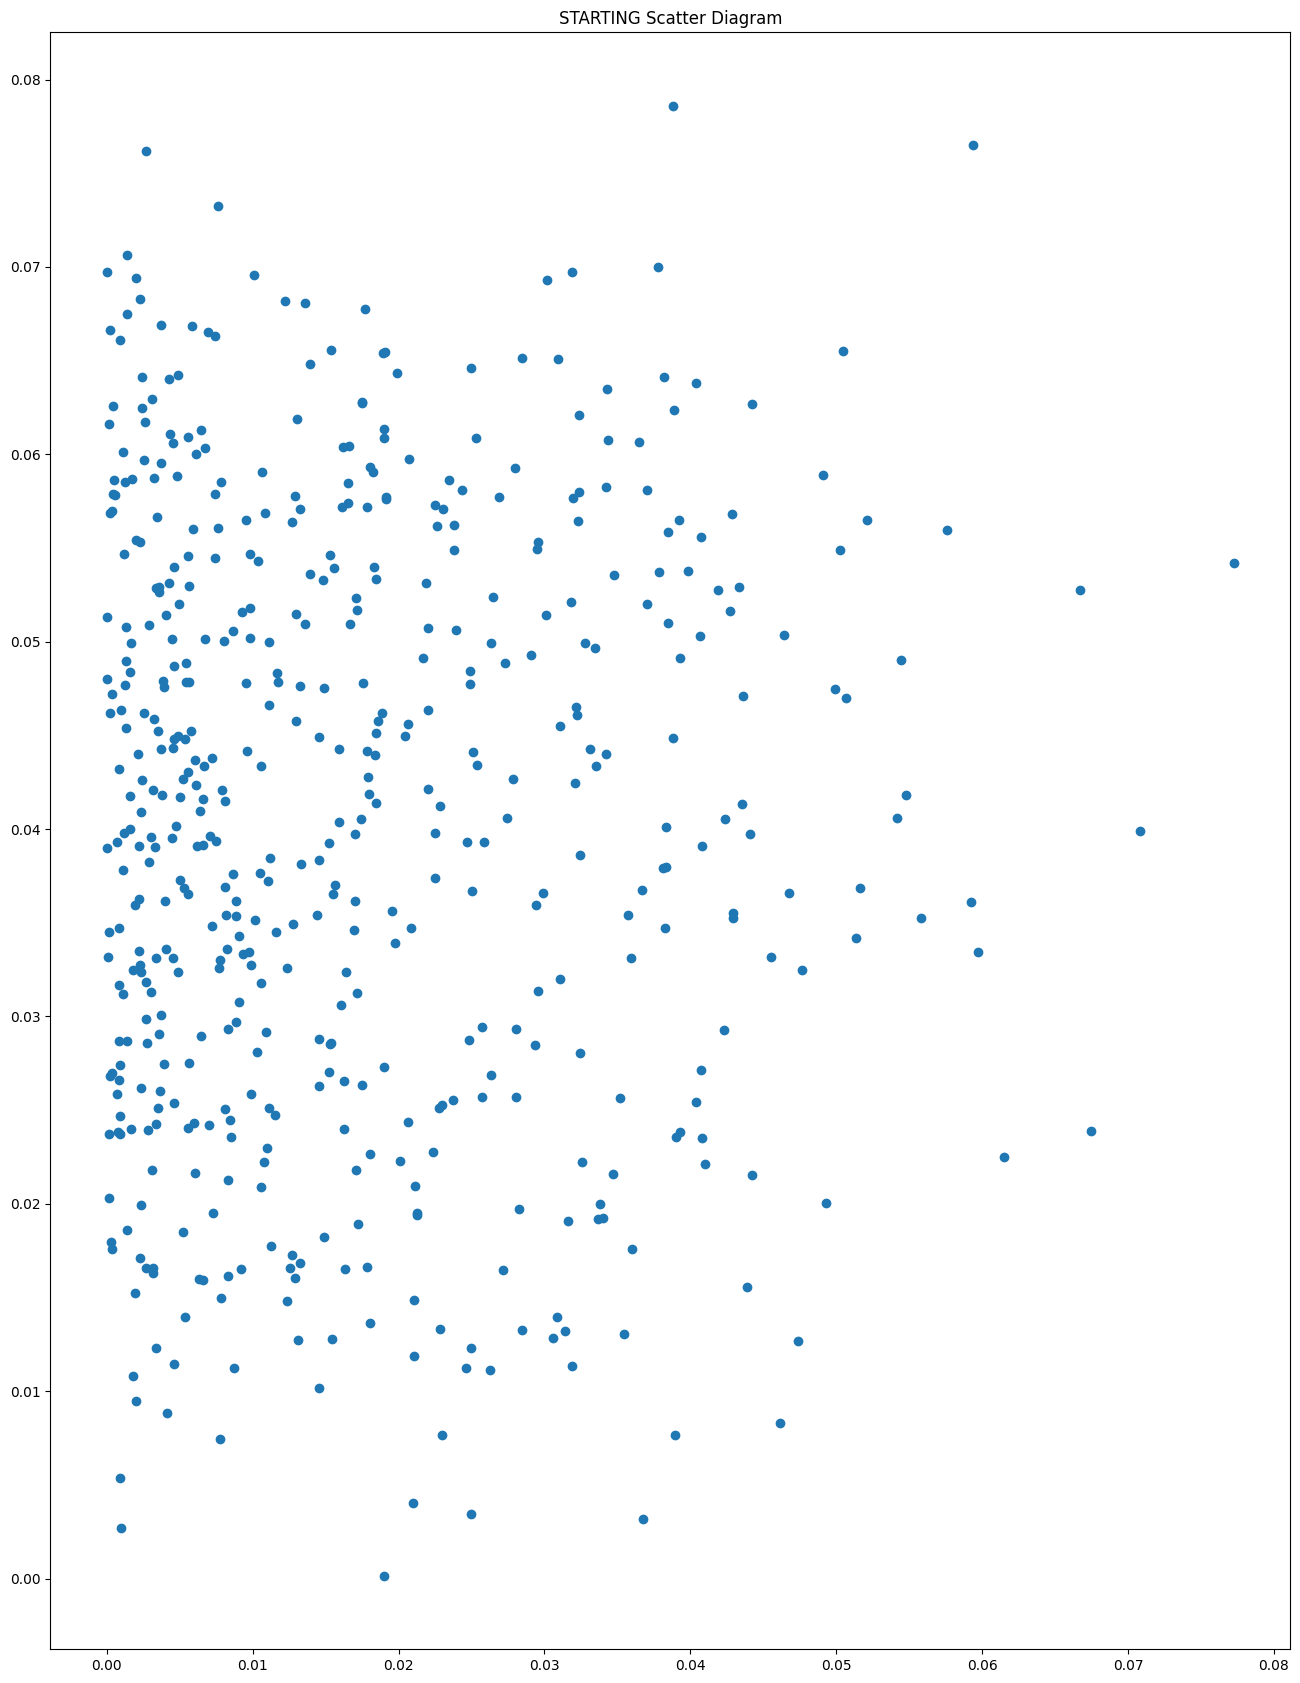

2022-08-31 04:58:17.953 | INFO     | src.autograd_mds:stress:53 - Sstar: 0.1416870058707016
2022-08-31 04:58:17.955 | INFO     | src.autograd_mds:stress:55 - Tstar: 1.0000000000000002
2022-08-31 04:58:17.956 | INFO     | src.autograd_mds:my_mds_training_loop:235 - stress: 0.37641334443760305
2022-08-31 04:58:18.048 | INFO     | src.autograd_mds:stress:53 - Sstar: Autograd ArrayBox with value 0.5375157887864888
2022-08-31 04:58:18.050 | INFO     | src.autograd_mds:stress:55 - Tstar: 1.0000000000000002
2022-08-31 04:58:18.172 | INFO     | src.autograd_mds:my_mds_training_loop:241 - Gradient magnitude: 0.5824783120143128


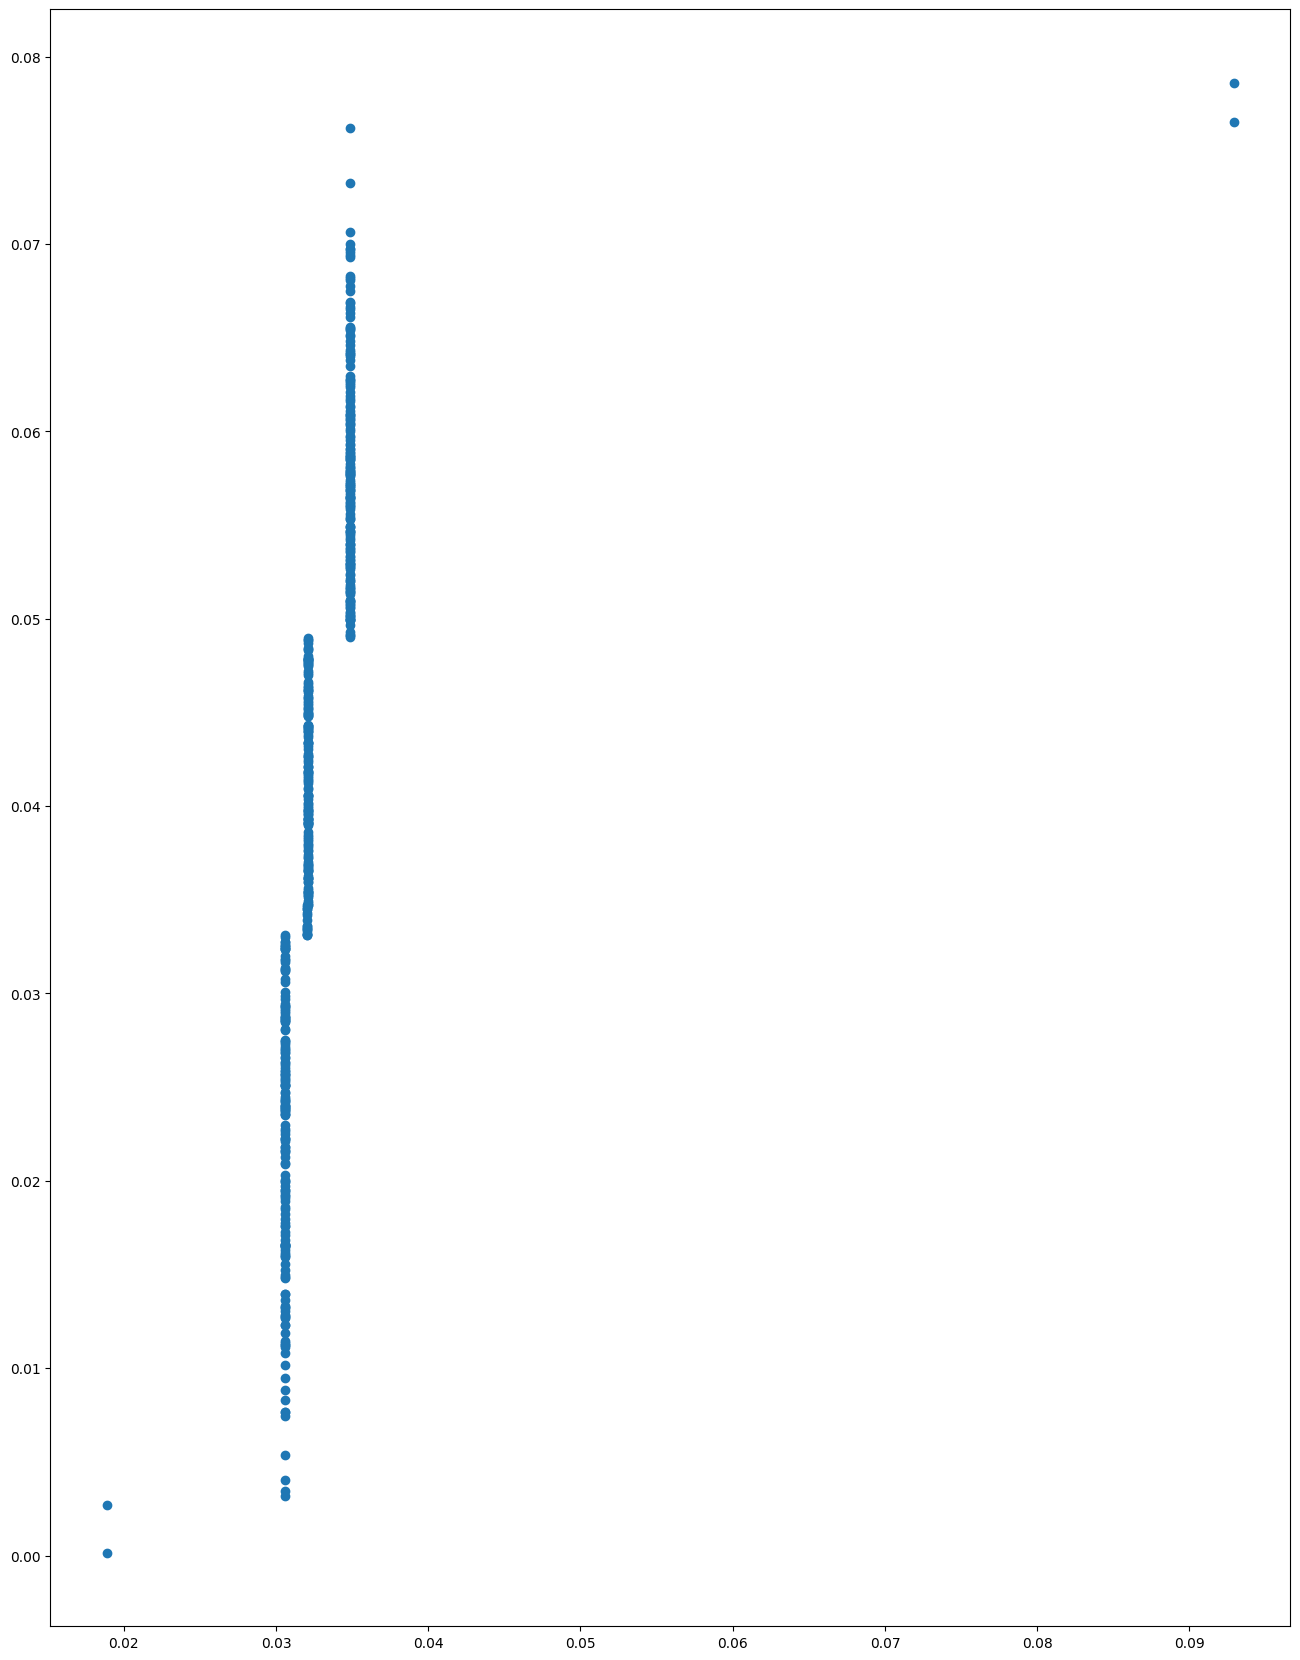

2022-08-31 04:58:21.856 | INFO     | src.autograd_mds:stress:53 - Sstar: 0.09317098497284473
2022-08-31 04:58:21.858 | INFO     | src.autograd_mds:stress:55 - Tstar: 1.0000000000000002
2022-08-31 04:58:21.859 | INFO     | src.autograd_mds:my_mds_training_loop:235 - stress: 0.3052392258096012
2022-08-31 04:58:21.956 | INFO     | src.autograd_mds:stress:53 - Sstar: Autograd ArrayBox with value 69770.569971997
2022-08-31 04:58:21.957 | INFO     | src.autograd_mds:stress:55 - Tstar: 1.0000000000000002
2022-08-31 04:58:22.037 | INFO     | src.autograd_mds:my_mds_training_loop:241 - Gradient magnitude: 45.73517958521102


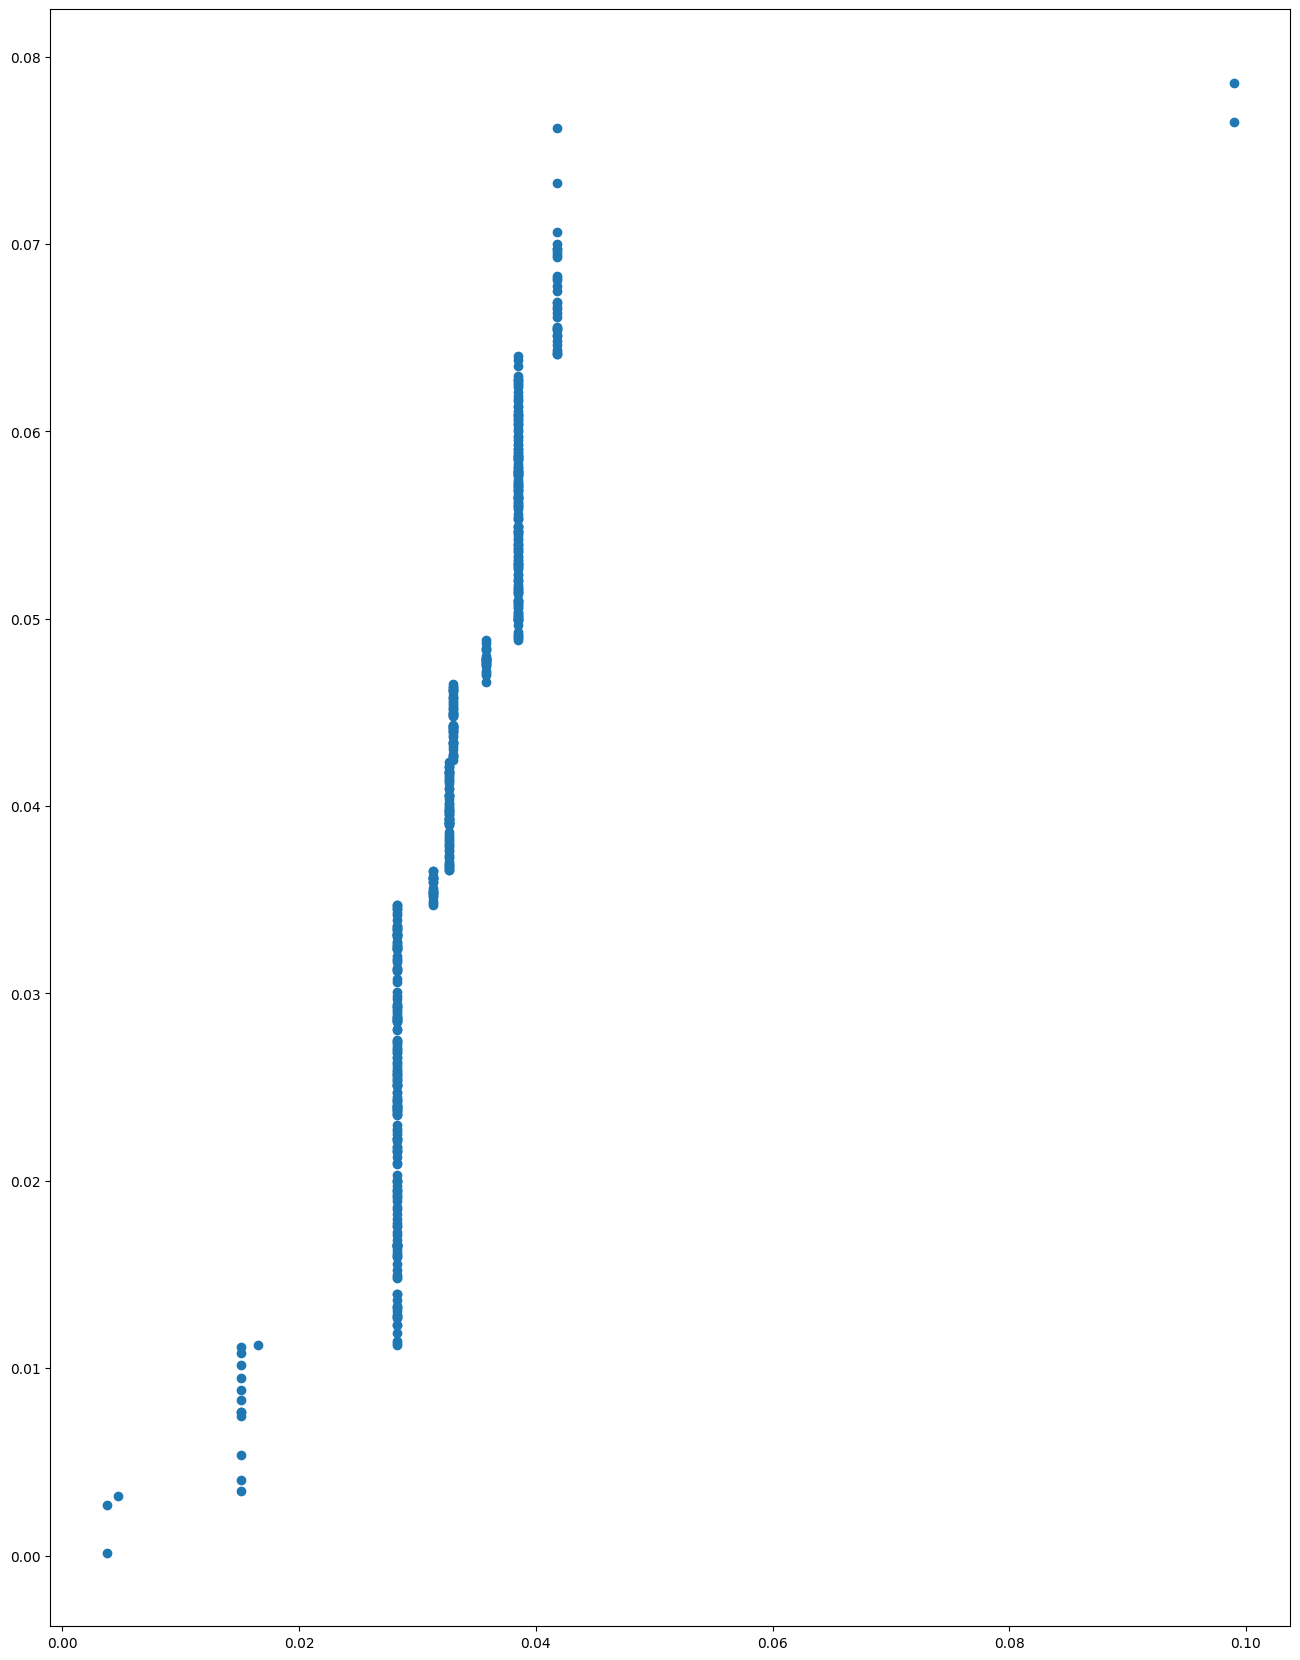

2022-08-31 04:58:25.834 | INFO     | src.autograd_mds:stress:53 - Sstar: 0.13480975305394055
2022-08-31 04:58:25.837 | INFO     | src.autograd_mds:stress:55 - Tstar: 1.0000000000000002
2022-08-31 04:58:25.838 | INFO     | src.autograd_mds:my_mds_training_loop:235 - stress: 0.3671644768410208
2022-08-31 04:58:26.077 | INFO     | src.autograd_mds:stress:53 - Sstar: Autograd ArrayBox with value 5.0666554244374874e+36
2022-08-31 04:58:26.078 | INFO     | src.autograd_mds:stress:55 - Tstar: 1.0000000000000002


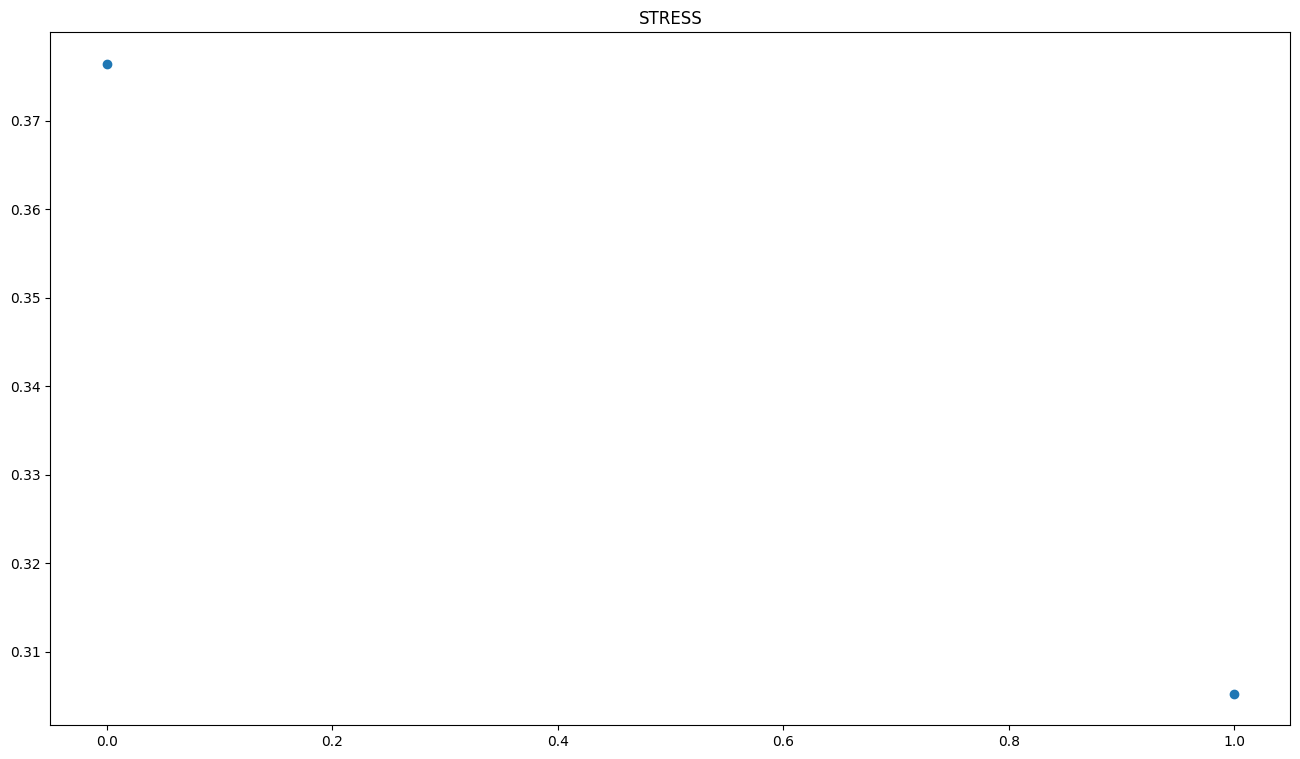

In [6]:
combi_config = my_mds_training_loop(dissimilarities, n_init=3, eps=0.005, dim=2)
    

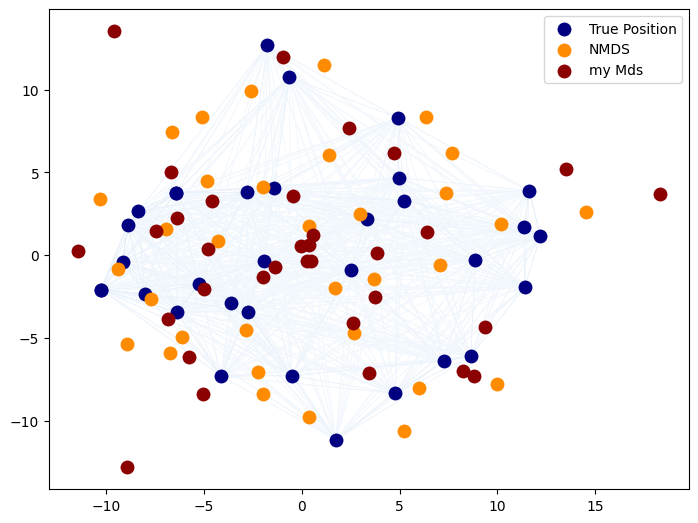

In [7]:
npos *= np.sqrt((X_true**2).sum()) / np.sqrt((npos**2).sum())
combi_config *= np.sqrt((X_true**2).sum()) / np.sqrt((combi_config**2).sum())
# Rotate the data
clf = PCA(n_components=2)
X_true = clf.fit_transform(X_true)


npos = clf.fit_transform(npos)
combi_config = clf.fit_transform(combi_config)

fig = plt.figure(1)
ax = plt.axes([0.0, 0.0, 1.0, 1.0])

s = 100
plt.scatter(X_true[:, 0], X_true[:, 1], color="navy", s=s, lw=0, label="True Position")
plt.scatter(npos[:, 0], npos[:, 1], color="darkorange", s=s, lw=0, label="NMDS")
plt.scatter(combi_config[:, 0], combi_config[:, 1], color="darkred", s=s, lw=0, label="my Mds")
plt.legend(scatterpoints=1, loc="best", shadow=False)

similarities = similarities.max() / (similarities + EPSILON) * 100
np.fill_diagonal(similarities, 0)
# Plot the edges
start_idx, end_idx = np.where(npos)
# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [
    [X_true[i, :], X_true[j, :]] for i in range(len(npos)) for j in range(len(npos))
]
values = np.abs(similarities)
lc = LineCollection(
    segments, zorder=0, cmap=plt.cm.Blues, norm=plt.Normalize(0, values.max())
)
lc.set_array(similarities.flatten())
lc.set_linewidths(np.full(len(segments), 0.5))
ax.add_collection(lc)

plt.show()

In [8]:
combi_config

array([[  2.40436084,   7.65275763],
       [ -4.99137676,  -2.06332457],
       [ -4.80064796,   0.37559614],
       [  3.44759868,  -7.13526995],
       [  9.3684341 ,  -4.34062634],
       [  8.26276572,  -6.98065347],
       [ -6.69424309,   5.02104344],
       [  0.36220162,   0.62096835],
       [ -1.35457353,  -0.69769685],
       [  2.62499589,  -4.11664794],
       [ 18.30064011,   3.71853431],
       [  8.79801405,  -7.28772688],
       [ 13.5230179 ,   5.22632019],
       [  3.87352347,   0.12004585],
       [ -5.76765319,  -6.18258021],
       [ -6.81132903,  -3.85874614],
       [  0.25911191,  -0.34127031],
       [ -4.60639378,   3.28794428],
       [ -9.58612702,  13.53022859],
       [ -6.37502478,   2.26968689],
       [  0.60312999,   1.18877985],
       [ -5.03327514,  -8.4080538 ],
       [ -0.9343025 ,  11.98762945],
       [ -7.4395081 ,   1.46505532],
       [ -1.96330911,  -1.3021667 ],
       [ -0.0448582 ,   0.56438668],
       [  3.74765552,  -2.54910964],
 

In [9]:
nineteen_config = generate_starting_configuration(dissimilarities, n_samples, dim=4) 

In [10]:
nineteen_config

array([[0.08169004, 0.11372433, 0.02825305, 0.07435576],
       [0.01552969, 0.11712642, 0.10291348, 0.06386692],
       [0.04645889, 0.10094053, 0.07392884, 0.08709675],
       [0.10604443, 0.08924804, 0.14330522, 0.13055987],
       [0.02258256, 0.04875848, 0.0402288 , 0.01291317],
       [0.12606655, 0.0698798 , 0.00643366, 0.10677283],
       [0.02720565, 0.0116819 , 0.00952625, 0.03345486],
       [0.14575168, 0.10661171, 0.00901176, 0.0576227 ],
       [0.01520466, 0.03884869, 0.08222922, 0.02985337],
       [0.13188696, 0.00877661, 0.13063345, 0.10661185],
       [0.09584867, 0.1110579 , 0.07482743, 0.09838159],
       [0.00499016, 0.13887811, 0.11123195, 0.00099456],
       [0.0057935 , 0.03214257, 0.12951703, 0.12628843],
       [0.083621  , 0.14397893, 0.12821041, 0.11962862],
       [0.02686663, 0.07940251, 0.08373808, 0.01941604],
       [0.13969313, 0.1085835 , 0.00113954, 0.00456515],
       [0.10258985, 0.00509635, 0.01903611, 0.06581653],
       [0.02772991, 0.0244265 ,